## Introduction to Linear Programming

Linear programming (LP) is a powerful mathematical technique used to optimize a linear objective function, subject to a set of linear constraints. It is commonly applied to problems involving resource allocation, cost minimization, or profit maximization.

---

## Four Primary Elements of LP

### 1. **Decision Variables**
These are the unknowns we aim to determine. They represent quantities that can be adjusted to achieve the best outcome.

**Example**  
Let:  
- $x_1$: number of chairs produced  
- $x_2$: number of tables produced

---

### 2. **Objective Function**
This is the function we want to **maximize** or **minimize**.

**Example (maximize profit):**  
$$
\text{Maximize } Z = 50x_1 + 100x_2
$$

Where:  
- $Z$: total profit  
- $50x_1$: profit from chairs  
- $100x_2$: profit from tables

---

### 3. **Constraints**
These are the limitations or requirements of the system, usually expressed as linear inequalities.

**Examples:**


- Labour constraint: The company has 200 hours of labour available weekly. Each chair requires 5 hours, and each table requires 10 hours.
  $$
  5x_1 + 10x_2 \leq 200
  $$
- Wood constraint: The company has 80 units of wood available. Each chair requires 1 unit, and each table requires 3 units.

  $$
  1x_1 + 3x_2 \leq 80
  $$
- Demand constraint: The company can sell a maximum of 20 tables per week.
  $$
  x_2 \leq 20
  $$
- Non-negativity: Production quantities cannot be negative. 
  $$
  x_1 \geq 0,\quad x_2 \geq 0
  $$

---

### 4. **Feasible Region**
This is the region that satisfies **all constraints**. It contains every possible solution that is valid for the problem.

The **optimal solution** lies at a **corner (vertex)** of this region.

In our furniture manufacturing example, the feasible region would be the area in the x₁-x₂ plane that satisfies all defined constraints. Note that x₁-x₂ plane is a graphical representation of the decision space, where each point on the plane corresponds to a specific combination of chair and table production levels:


  $$
  5x_1 + 10x_2 \leq 200
  $$
 
  $$
  1x_1 + 3x_2 \leq 80
  $$
 
  $$
  x_2 \leq 20
  $$
 
  $$
  x_1 \geq 0,\quad x_2 \geq 0
  $$



We can visualize the feasible region using Python with the help of the matplotlib library. Here's an example code snippet that plots the constraints and the feasible region:

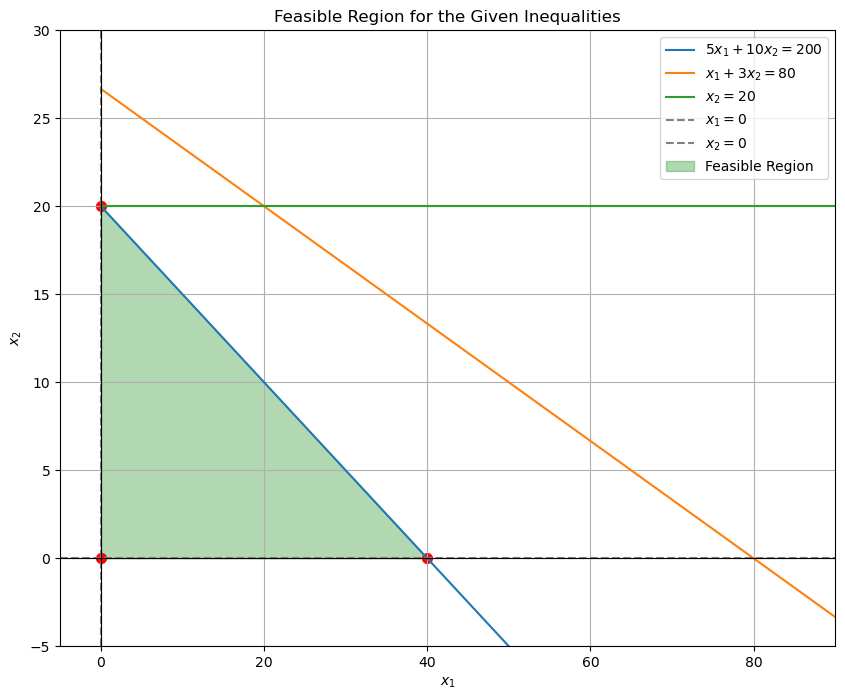

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
def constraint1(x1):
    return (200 - 5*x1) / 10

def constraint2(x1):
    return (80 - x1) / 3

def constraint3(x1):
    return 20 * np.ones_like(x1)

# Generate x1 values
x1 = np.linspace(0, 90, 400)

# Evaluate the constraints
C1 = constraint1(x1)
C2 = constraint2(x1)
C3 = constraint3(x1)

# Create the plot figure and axes
plt.figure(figsize=(10, 8))

# Plot the lines representing the boundaries of the inequalities
plt.plot(x1, C1, label=r'$5x_1 + 10x_2 = 200$') 
plt.plot(x1, C2, label=r'$x_1 + 3x_2 = 80$')   
plt.plot(x1, C3, label=r'$x_2 = 20$')         

# Plot the non-negativity constraints (x1 >= 0 and x2 >= 0)
plt.axvline(x=0, color='gray', linestyle='--', label=r'$x_1 = 0$') 
plt.axhline(y=0, color='gray', linestyle='--', label=r'$x_2 = 0$') 

# Fill the feasible region
x2_lower_bound = np.maximum(0, x1 * 0) 
x2_upper_bound = np.minimum(C1, np.minimum(C2, C3))
x1_feasible_indices = x1 >= 0
x1_filtered = x1[x1_feasible_indices]
x2_upper_bound_filtered = x2_upper_bound[x1_feasible_indices]
x2_lower_bound_filtered = x2_lower_bound[x1_feasible_indices]
plt.fill_between(x1_filtered, x2_lower_bound_filtered, x2_upper_bound_filtered,
                 where=(x2_upper_bound_filtered >= x2_lower_bound_filtered), 
                 color='green', alpha=0.3, label='Feasible Region')

# Set plot limits for better visualization
plt.xlim(-5, 90) 
plt.ylim(-5, 30) 

# Add labels and title to the plot
plt.xlabel(r'$x_1$') 
plt.ylabel(r'$x_2$') 
plt.title('Feasible Region for the Given Inequalities') 

# Display the legend to identify each line and the feasible region
plt.legend()

# Add a grid for easier reading of values
plt.grid(True)

# Draw thicker black lines for the x and y axes at x=0 and y=0
plt.axvline(x=0, color='black', linewidth=0.8)
plt.axhline(y=0, color='black', linewidth=0.8)

# Calculate vertices dynamically
x1_vertex1 = 0
x2_vertex1 = constraint3(x1_vertex1)

x1_vertex2 = 0
x2_vertex2 = 0

x1_vertex3 = 40
x2_vertex3 = 0

# Add circles to vertices
vertices = [(x1_vertex1, x2_vertex1), (x1_vertex2, x2_vertex2), (x1_vertex3, x2_vertex3)]
for vertex in vertices:
    plt.scatter(vertex[0], vertex[1], color='red', s=50)

# Save the plot to a file
# plt.savefig('feasible_region.png')

# Show the plot (optional, as it's saved to a file)
plt.show()


## Solve the LP Using Google OR-Tools

We now solve the LP problem using the OR-Tools solver.


In [37]:

from ortools.linear_solver import pywraplp



# Create solver instance
solver = pywraplp.Solver.CreateSolver("GLOP")

# Variables
x1 = solver.NumVar(0, solver.infinity(), "x1")  # chairs
x2 = solver.NumVar(0, solver.infinity(), "x2")  # tables

# Constraints
solver.Add(5 * x1 + 10 * x2 <= 200)  # labor
solver.Add(x1 + 3 * x2 <= 80)        # wood
solver.Add(x2 <= 20)                 # market demand

# Objective
solver.Maximize(50 * x1 + 100 * x2)

# Solve
status = solver.Solve()

# Results
if status == pywraplp.Solver.OPTIMAL:
    print("Optimal Solution:")
    print(f"x1 (Chairs): {x1.solution_value()}")
    print(f"x2 (Tables): {x2.solution_value()}")
    print(f"Maximum Profit: ${solver.Objective().Value()}")
else:
    print("No optimal solution found.")


Optimal Solution:
x1 (Chairs): 40.0
x2 (Tables): 0.0
Maximum Profit: $2000.0


## The Simplex Method: Introduction and Application

The **Simplex Method** is a widely used algorithm for solving linear programming (LP) problems, especially when the problem involves more than two variables and cannot be solved graphically. Graphical methods only work for two-variable problems. The Simplex Method, however, scales to high-dimensional problems and is computationally efficient.


## Simplex Method Application Example

## Linear Programming Example

We are given the following linear programming problem:

**Objective:**  
Maximize:  
$$
P = 2x + 5y
$$

**Subject to the constraints:**
$$
2x + y \leq 5 \\
x + 2y \leq 4 \\
x \geq 0, \quad y \geq 0
$$

We will solve this problem using:
- Simplex Method
- Google OR‑Tools (for maximization directly)



#### Using Google OR-TOOL

In [27]:
from ortools.linear_solver import pywraplp

# Initialize solver
solver = pywraplp.Solver.CreateSolver("GLOP")
x = solver.NumVar(0, solver.infinity(), "x")
y = solver.NumVar(0, solver.infinity(), "y")

# Add constraints
solver.Add(2 * x + y <= 5)
solver.Add(x + 2 * y <= 4)

# Define the objective
solver.Maximize(2 * x + 5 * y)

# Solve
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print("OR‑Tools Solution:")
    print(f"x = {x.solution_value():.2f}")
    print(f"y = {y.solution_value():.2f}")
    print(f"Maximized P = {solver.Objective().Value():.2f}")
else:
    print("No optimal solution found.")


OR‑Tools Solution:
x = 0.00
y = 2.00
Maximized P = 10.00


#### Another approach - for advanced Students!

In [28]:
from scipy.optimize import linprog

# Convert maximization to minimization by negating the objective
c = [-2, -5]  # Maximize 2x + 5y → Minimize -2x -5y

# Constraint coefficients and bounds
A = [[2, 1],
     [1, 2]]
b = [5, 4]
bounds = [(0, None), (0, None)]  # x >= 0, y >= 0

# Solve using the 'highs' method
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Output results
if res.success:
    print("Simplex Method via SciPy:")
    print(f"x = {res.x[0]:.2f}")
    print(f"y = {res.x[1]:.2f}")
    print(f"Maximized P = {-res.fun:.2f}")
else:
    print("No optimal solution found.")


Simplex Method via SciPy:
x = 0.00
y = 2.00
Maximized P = 10.00
